# **Covid Prediction** **Model** 

Importing libraries

In [ ]:
#import dependencies 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
%matplotlib inline

import plotly
import plotly.express as px
import plotly.graph_objects as go
import cufflinks as cf
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot


pyo.init_notebook_mode(connected=True)
cf.go_offline()
from plotly.offline import init_notebook_mode,plot,iplot
plotly.io.renderers.default = 'colab'

loading dataset

In [ ]:
#reading the dataset using pandas library
df = pd.read_csv('/content/state_wise_daily.csv',parse_dates=['Date','Date_YMD'])

In [ ]:
#This head method prints the first 10 data rows from the dataset 
df.tail()

,Date,Date_YMD,Status,TT,AN,AP,AR,AS,BR,CH,...,PB,RJ,SK,TN,TG,TR,UP,UT,WB,UN
2182,2022-03-11,3/11/2022,Recovered,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2183,2022-03-11,3/11/2022,Deceased,89.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2184,2022-03-12,3/12/2022,Confirmed,3116.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,71,0
2185,2022-03-12,3/12/2022,Recovered,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2186,2022-03-12,3/12/2022,Deceased,47.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Data cleaning and preprocessing

In [ ]:
# below we are extracting the data only which is required 
# we are taking date and status columns from the dataset
pivot = pd.pivot_table(df,values='TT',index='Date',columns='Status').sort_values(by='Date') #seperating of relevant features

converting into dataframe

In [ ]:
#we are converting the data into a dataframe 
#using pandas library
finalData = pd.DataFrame(pivot)


Resetting index according to the new data

In [ ]:
#Resetting the indexes of the data which is extracted 
finalData.reset_index(inplace=True)

In [ ]:
#This will print the first five data rows of the dataframe which we are going to use
#for our predictions.
finalData.head()

Status,Date,Confirmed,Deceased,Recovered
0,2020-03-14,81.0,2.0,9.0
1,2020-03-15,27.0,0.0,4.0
2,2020-03-16,15.0,0.0,1.0
3,2020-03-17,11.0,1.0,1.0
4,2020-03-18,37.0,0.0,0.0


In [ ]:
#This will print the datatypes of the dataframe.
finalData.dtypes

Status
Date         datetime64[ns]
Confirmed           float64
Deceased            float64
Recovered           float64
dtype: object

# **Future Prediction of Confirmed Cases on** **finalData** ****

**Visualization of the data we make predictions**

In [ ]:
#Plotting the graph of the confirmed cases of west bengal state from the dataset
#With respect to the date 
finalData.iplot(kind='scatter',x='Date',y='Confirmed',xTitle='Months',yTitle='Count of Cases',title='CONFIRMED') #Confirmed cases visualization


**Seperating different categories**

In [ ]:
#we are seperating the data with respect to their status.
Confirmed = finalData[['Date','Confirmed']]
Recovered = finalData[['Date','Recovered']]
Deceased = finalData[['Date','Deceased']]

In [ ]:
#Confirmed cases data
Confirmed.tail()

Status,Date,Confirmed
724,2022-03-08,4575.0
725,2022-03-09,4184.0
726,2022-03-10,4194.0
727,2022-03-11,3614.0
728,2022-03-12,3116.0


In [ ]:
#Confirmed cases data types
Confirmed.dtypes

Status
Date         datetime64[ns]
Confirmed           float64
dtype: object

In [ ]:
#AS the fbprophet model takes inuput columns of date as ds and confirmed or recovered or deceased cases ad y
Confirmed.columns = ['ds','y']
Recovered.columns = ['ds','y']
Deceased.columns = ['ds','y']

**Renaming the columns**

# **Model Initialization and Evaluation**

***We are using fbprophet model for predicting future cases***

In [ ]:
#Initializing the model
#fbprophet model is the time series forecasting model which helps us to make predictions 
#based on the previous data
# This model also provides us the weakly, yearly, monthly trends also
from fbprophet import Prophet
m = Prophet(interval_width=0.95,yearly_seasonality=True,daily_seasonality=True,weekly_seasonality=True)

In [ ]:
#Fitting the model with data
m.fit(Confirmed)

**Creating the future dataset for future predictions**

In [ ]:
# We are making the future dates for predictions
future = m.make_future_dataframe(periods=10)
future.tail(10)
dtts = future.tail(10)

In [ ]:
#forecasting with model
#predicting the cases for the future 10 days 
# ds = dates
#yhat = predicted outputs
# yhat_upper = upper limit the prediction values
#yhat_lower = lower limit of the prediction values
forecast = m.predict(future)
forecast[['ds','yhat','yhat_upper','yhat_lower']].tail(10)

,ds,yhat,yhat_upper,yhat_lower
729,2022-03-13,108987.857528,211458.453643,7725.990686
730,2022-03-14,108203.498067,207097.344826,13703.192280
731,2022-03-15,121738.169218,215657.769832,27533.350997
732,2022-03-16,132743.393375,226331.766770,33722.598420
733,2022-03-17,138758.624370,240680.949262,42045.182967
734,2022-03-18,144673.581976,240531.667757,48165.033045
735,2022-03-19,151330.243333,246665.475777,55131.311585
736,2022-03-20,155682.930722,260695.069523,63631.456892
737,2022-03-21,153706.690369,253144.147528,60965.149120
738,2022-03-22,165819.489114,267332.801845,72359.009875


In [ ]:
#This is the first 10 rows of the we are predicted
# it shows weakly trends , monthly, yearly trends.
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-03-14,-20542.521519,-223031.619757,-26413.532873,-20542.521519,-20542.521519,-106241.278464,-106241.278464,-106241.278464,-82665.745579,...,1892.117343,1892.117343,1892.117343,-25467.650228,-25467.650228,-25467.650228,0.0,0.0,0.0,-126783.799983
1,2020-03-15,-19761.523370,-219811.788981,-31350.075121,-19761.523370,-19761.523370,-101554.715058,-101554.715058,-101554.715058,-82665.745579,...,131.706472,131.706472,131.706472,-19020.675950,-19020.675950,-19020.675950,0.0,0.0,0.0,-121316.238428
2,2020-03-16,-18980.525221,-220881.591419,-28753.120851,-18980.525221,-18980.525221,-103050.815182,-103050.815182,-103050.815182,-82665.745579,...,-7691.699094,-7691.699094,-7691.699094,-12693.370509,-12693.370509,-12693.370509,0.0,0.0,0.0,-122031.340404
3,2020-03-17,-18199.527073,-200899.717130,-13613.630311,-18199.527073,-18199.527073,-90334.233447,-90334.233447,-90334.233447,-82665.745579,...,-1142.465707,-1142.465707,-1142.465707,-6526.022161,-6526.022161,-6526.022161,0.0,0.0,0.0,-108533.760520
4,2020-03-18,-17418.528924,-189571.673652,4992.430349,-17418.528924,-17418.528924,-80245.165939,-80245.165939,-80245.165939,-82665.745579,...,2975.624870,2975.624870,2975.624870,-555.045229,-555.045229,-555.045229,0.0,0.0,0.0,-97663.694863


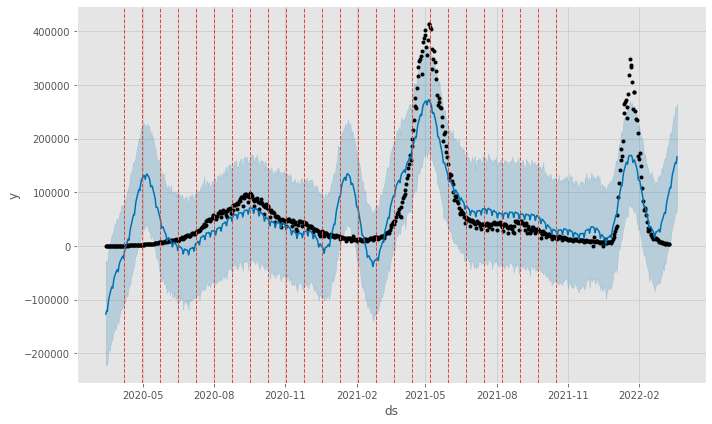

In [ ]:
#forecast plot 
#below we are ploting the predicted values vs the trained data
# blue color line is the hypothesis line created by the model
# Black color line is the data from the dataset we used 
confirmed_forecast_plot = m.plot(forecast)
confirmed_forecast_plot
for changepoint in m.changepoints:
    plt.axvline(changepoint,ls='--', lw=1)

In [ ]:
import pickle


In [ ]:
pickle.dump(m, open('India_model', 'wb'))

# **WB model exrtaction**



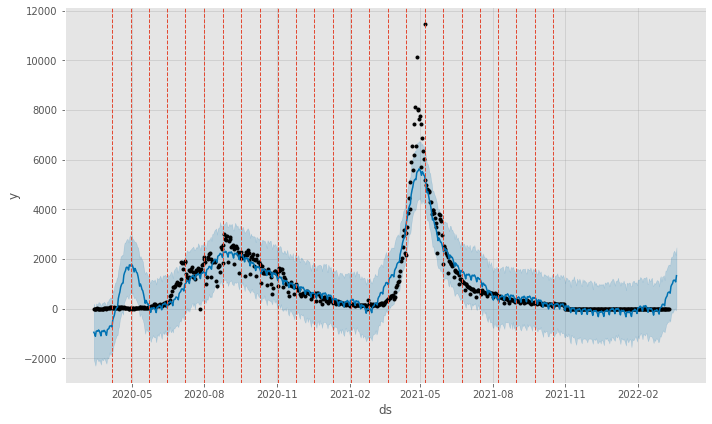

In [ ]:
import pandas as pd
import pickle

pivot = pd.pivot_table(df,values='TG',index='Date',columns='Status').sort_values(by='Date') #seperating of relevant features

finalData = pd.DataFrame(pivot)
finalData.reset_index(inplace=True)

Confirmed = finalData[['Date','Confirmed']]
Recovered = finalData[['Date','Recovered']]
Deceased = finalData[['Date','Deceased']]


Confirmed.columns = ['ds','y']
Recovered.columns = ['ds','y']
Deceased.columns = ['ds','y']

from fbprophet import Prophet
m = Prophet(interval_width=0.95,yearly_seasonality=True,daily_seasonality=True,weekly_seasonality=True)


m.fit(Confirmed)

future = m.make_future_dataframe(periods=10)
future.tail(10)
dtts = future.tail(10)

forecast = m.predict(future)
forecast[['ds','yhat','yhat_upper','yhat_lower']].tail(10)


forecast.head()

confirmed_forecast_plot = m.plot(forecast)
confirmed_forecast_plot
for changepoint in m.changepoints:
    plt.axvline(changepoint,ls='--', lw=1)


pickle.dump(m, open('TG_model', 'wb'))


In [ ]:
#################################
#                               #
#  Generating Future dates      #
#                               #
#################################

import pandas as pd

class Dates:

    __existMonths = ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12"]
    __existDays = ["31", "28", "31", "30", "31", "30", "31", "31", "30", "31", "30", "31"] 

    def __init__(self, num, startDate) -> None:
        self.num = num
        self.startDate = startDate

    def __dateParser(self):

        startDate = list(self.startDate)
        year = "".join(startDate[:4])
        month = "".join(startDate[5:7])
        day = "".join(startDate[8:10])
        # print(f"{year}-{month}-{day}")

        #temp
        mnth = month
        yea = year 
        dat = day

        
        mm = int(mnth)
        yy = int(yea)
        dd = int(dat)


        resultDates = []


        for i in range(self.num):
            
            if mnth in Dates.__existMonths:
                if dat == Dates.__existDays[mm-1]:
                    newDate = f"{yea}-{mnth}-{dat}"
                   
                    resultDates.append(newDate)

                    if mnth[0]=="0":
                        
                        mm+=1

                        if mm<10:
                            mnth = f"0{mm}"
                            
                        else:
                            mnth = f"{mm}"
                    else:
                        mm+=1
                        if mm>12:
                            mm = 1
                            mnth = f"0{mm}"
                            yy+=1
                            yea = f"{yy}"
                        else:
                            mnth = f"{mm}"              
                    dat = f"0{1}"
                    
                    
                elif dat != Dates.__existDays[mm-1]:
                    newDate = f"{yea}-{mnth}-{dat}"
                   
                    resultDates.append(newDate)
                    if dat[0]=="0":
                        dd = int(dat)
                        dd+=1  
                        if dd<10:
                            dat = f"0{dd}"      
                        else:
                            dat = f"{dd}"        
                    else:
                        dd = int(dat)
                        dd+=1
                        dat = f"{dd}"
                        
        #write_file("output.csv", resultDates)          
              
        return resultDates
        

    def futureDates(self):
        values = self.__dateParser()
        df = pd.DataFrame(values)
        df.columns=['ds']
        return df


In [ ]:
#####################################
#                                   #
#    Prediction Model               #
#                                   # 
#####################################  

from cProfile import label
from cmath import e
import pickle
from tempfile import tempdir
import pandas as pd
import matplotlib.pyplot as plt
from functools import reduce


class Model:

    __modelName = '/content/india_model'
    __categoryName = 'TT'

    def __init__(self, n, date, df, m) -> None:
        self.n = n
        self.date = date
        self.df = df
        self.m = m


    def predictions(self):
        dates = Dates(self.n, self.date)
        val = dates.futureDates()
        print(Model.__modelName)
        with open(Model.__modelName,'rb') as f:
            model = pickle.load(f)
        try:
            output = model.predict(val)
            # model.plot(output)
            # for changepoint in model.changepoints:
            #     plt.axvline(changepoint,ls='--', lw=1)
        except e:
            print(e)
        return output['yhat']

    def data_extraction(self, df):

        dates = Dates(self.n, self.date)
        val = dates.futureDates()
        val['ds'] = val['ds'].astype('datetime64')
        print(Model.__categoryName)
        pivot = pd.pivot_table(df,values=Model.__categoryName,index='Date',columns='Status').sort_values(by='Date') #seperating of relevant features
        finalData = pd.DataFrame(pivot)
        finalData.reset_index(inplace=True)   
        

        #val and finalData df1 and df2
        results = pd.merge(val, 
                  finalData[['Date', 'Confirmed']],
                  left_on='ds',
                  right_on='Date',
                  how='left')

        return results


    def graph(self):
        preds = self.predictions()
        preds = pd.DataFrame(preds)
        
        extracts = self.data_extraction(self.df)
        
        plt.plot(extracts['ds'], preds['yhat'], label='predicted cases')
        plt.plot(extracts['ds'], extracts['Confirmed'], label='Actual cases')
        plt.ylabel('Cases')
        plt.xlabel('Dates')
        plt.legend(loc='upper right')
        plt.show()
    
    def switch(self):
        try:
            if self.m==1:
                Model.__modelName = '/content/India_model'
                Model.__categoryName = 'TT'
                self.graph()
            elif self.m==2:
                Model.__modelName = '/content/TG_model'
                Model.__categoryName = 'WB'
                self.graph()
        except e:
            print(e)

# below code is for Model Class
print('1 for predicting India Cases\n')
print('2 for predicting Telangana Cases\n')
m = int(input())
n = int(input("Enter the numner of days to predict\n"))
date = input("Enter the Starting date in the given format YYYY-MM-DD\n")
df = pd.read_csv('/content/state_wise_daily.csv',parse_dates=['Date','Date_YMD'])
model = Model(n, date, df, m)
model.switch()

